In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import sys
import random
import os
import Levenshtein
import pickle
# To allow imports from common directory
sys.path.append('../../')
from common.plot_style_utils import set_pub_plot_context, rep_names, save_for_pub, label_point
from common.embedding_tools import lev_dist_matrix, lev_sim_matrix

%matplotlib inline
random.seed(42)
np.random.seed(42)

In [2]:
meta = pd.read_pickle("../../data/protein_arithmetic.pkl")

In [3]:
with open("../../data/models3_only_organism_pca.pkl", "rb") as p:
    pca = pickle.load(p)
print(pca)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


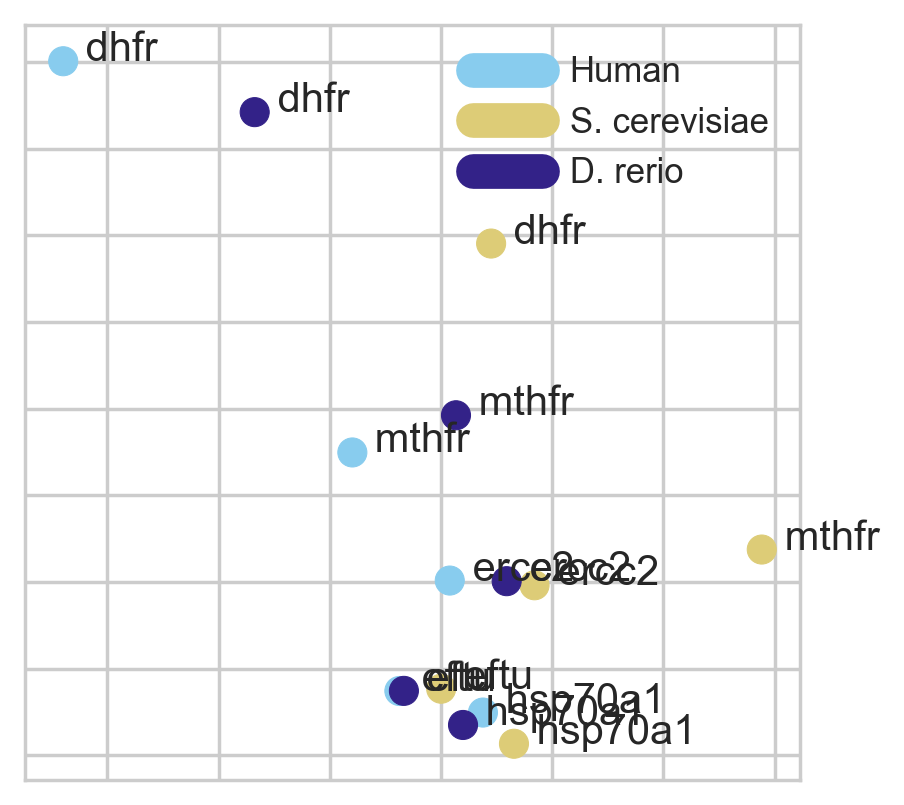

In [4]:
components = pca.transform(meta.avg_hidden.tolist())
set_pub_plot_context(context="notebook")
fig = plt.figure(figsize=(4,4), dpi=250)
ax = fig.add_subplot(111)
x = components[:,0]
y = components[:,1]
colors = {
    "HUMAN":sns.color_palette()[0],
    "DANRE":sns.color_palette()[4],
    "YEAST":sns.color_palette()[2],
}
pretty_names = {
    "HUMAN":"Human",
    "DANRE":"D. rerio",
    "YEAST":"S. cerevisiae",
}
colorpal = [colors[o] for o in meta.organism]
ax.scatter(x=x,y=y, c=colorpal, s=70)
label_point(pd.Series(x),pd.Series(y),
            pd.Series(meta.function.map(lambda x: " " + x).values),
            ax, fontsize=12)

custom_lines = [
    Line2D([0], [0], color=colors[o], lw=10) for o in meta.organism.unique().tolist()
]
ax.legend(custom_lines, [pretty_names[o] for o in meta.organism.unique().tolist()])
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
# Will be edited in post So the labels dont clash, etc
save_for_pub(fig, path="./img/S2", dpi=250)